In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### 데이터 전처리

In [2]:
X_before_selection = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/예비실험 4/예비실험4 - Extract & Imputation/X_data_before_MI.csv')
y = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/예비실험 4/예비실험4 - Extract & Imputation/y_target.csv')

In [3]:
#meta feature 추가
X_before_selection['diag_minus_onset'] = X_before_selection['diag_delta']-X_before_selection['onset_delta']

In [4]:
feature_list = ["min_alsfrs_hands","max_pulse","mean_alsfrs_total","diag_minus_onset","onset_site","diag_delta","mean_alsfrs_leg","min_bp_d","alsfrs_total_slope","max_weight"]

In [5]:
X = X_before_selection[feature_list]

In [6]:
y = y.drop(columns='Unnamed: 0')

### Train/Test set 분리

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

### 모델 생성 및 학습

### (1) Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
# LinearRegression 모델 생성/학습
model_lr = LinearRegression()
fitted_model_lr = model_lr.fit(X_train, y_train)

In [10]:
import statsmodels.api as sm
x_train1 = sm.add_constant(X_train,has_constant="add")

model = sm.OLS(y_train,X_train)
fitted_model_lr2 = model.fit()

fitted_model_lr2.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           ALSFRS_slope   R-squared (uncentered):                   0.611
Model:                            OLS   Adj. R-squared (uncentered):              0.609
Method:                 Least Squares   F-statistic:                              387.2
Date:                Thu, 01 Apr 2021   Prob (F-statistic):                        0.00
Time:                        13:46:53   Log-Likelihood:                         -2138.6
No. Observations:                2476   AIC:                                      4297.
Df Residuals:                    2466   BIC:                                      4355.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
min_alsfrs_hands      -0.0179      0.008     -2.116      0.034      -0.035      -0.001
max_pulse             -0.0076      0.001     -9.091      0.000      -0.009      -0.006
mean_alsfrs_total      0.0144      0.004      3.452      0.001       0.006       0.023
diag_minus_onset       0.0002   4.69e-05      3.945      0.000    9.31e-05       0.000
onset_site             0.0437      0.018      2.423      0.015       0.008       0.079
diag_delta            -0.0002    4.8e-05     -4.115      0.000      -0.000      -0.000
mean_alsfrs_leg       -0.0403      0.008     -5.175      0.000      -0.056      -0.025
min_bp_d              -0.0051      0.001     -4.542      0.000      -0.007      -0.003
alsfrs_total_slope     0.4031      0.196      2.059      0.040       0.019       0.787
max_weight            -0.0002      0.001     -0.204      0.839      -0.002       0.001
==============================================================================
Omnibus:                      233.618   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              328.818
Skew:                          -0.744   Prob(JB):                     3.96e-72
Kurtosis:                       3.988   Cond. No.                     8.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
fitted_model_lr2.params

min_alsfrs_hands     -0.017917
max_pulse            -0.007646
mean_alsfrs_total     0.014430
diag_minus_onset      0.000185
onset_site            0.043688
diag_delta           -0.000198
mean_alsfrs_leg      -0.040256
min_bp_d             -0.005144
alsfrs_total_slope    0.403121
max_weight           -0.000150
dtype: float64

### (2) XGBoost

In [12]:
from xgboost import XGBRegressor

In [13]:
# XGBRegressor 모델 생성/학습
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

[13:46:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

### (3) Random Forests

In [14]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import GridSearchCV

model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### 모델 평가하기

### (1) MAE, RMSE, R2

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

In [16]:
# Predict를 수행하고 mean_absolute_error, rmse, r-squared 결과 출력하기
pred_xgb = model_xgb.predict(X_test)
pred_lr = model_lr.predict(X_test)
pred_rf = model_rf.predict(X_test)

print('XGB MAE:', mean_absolute_error(y_test, pred_xgb))
print('XGB RMSE:', sqrt(mean_squared_error(y_test, pred_xgb)))
print('XGB R2:',  r2_score(y_test, pred_xgb))

print('LR MAE:', mean_absolute_error(y_test, pred_lr))
print('LR RMSE:', sqrt(mean_squared_error(y_test, pred_lr)))
print('LR R2:',  r2_score(y_test, pred_lr))

print('RF MAE:', mean_absolute_error(y_test, pred_rf))
print('RF RMSE:', sqrt(mean_squared_error(y_test, pred_rf)))
print('RF R2:',  r2_score(y_test, pred_rf))

XGB MAE: 0.4300586017081037
XGB RMSE: 0.5447773334542598
XGB R2: 0.1154618308516907
LR MAE: 0.4407879846830393
LR RMSE: 0.5573841000905684
LR R2: 0.07404971284617023
RF MAE: 0.43771091198497025
RF RMSE: 0.5592393339035955
RF R2: 0.06787546714706572


### (2) Pearson Correlation score

In [17]:
import scipy.stats as stats
print("XGB PC:", stats.pearsonr(x = y_test, y = pred_xgb))
print("LR PC:", stats.pearsonr(x = y_test, y = pred_lr))
print("RF PC:", stats.pearsonr(x = y_test, y = pred_rf))

TypeError: ignored

### (3) 실제 값과 추측 값 시각화

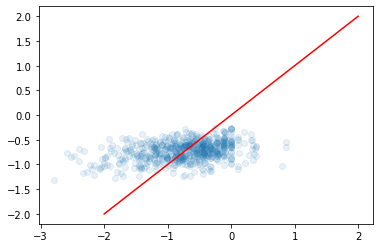

In [18]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
plt.scatter(y_test, pred_xgb, alpha=0.1)
plt.plot([-2, 2], [-2,2], 'r-')

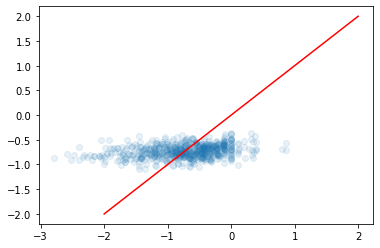

In [19]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
plt.scatter(y_test, pred_lr, alpha=0.1)
plt.plot([-2, 2], [-2, 2], 'r-')

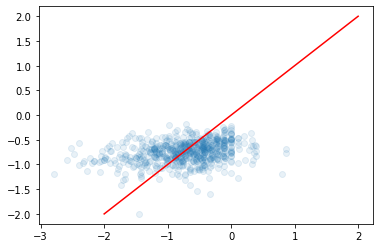

In [20]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
plt.scatter(y_test, pred_rf, alpha=0.1)
plt.plot([-2, 2], [-2,2], 'r-')

### (4) XGBoost와 Random forest 모델의 feature importance 시각화

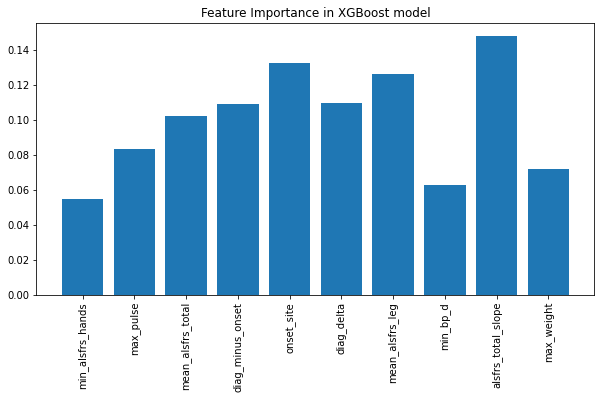

In [21]:
fig = plt.figure(figsize=(10,5))
plt.bar(X_train.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.title('Feature Importance in XGBoost model')
plt.show()

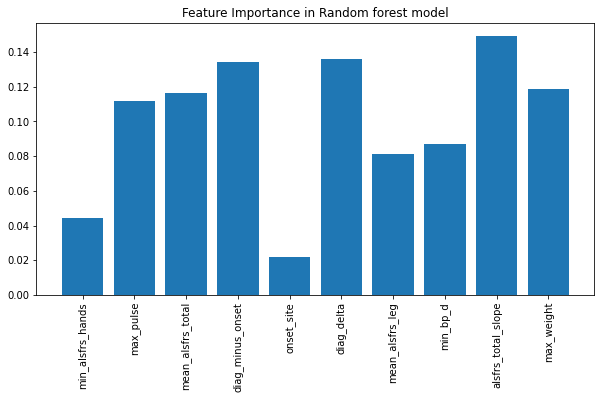

In [22]:
fig2 = plt.figure(figsize=(10,5))
plt.bar(X_train.columns, model_rf.feature_importances_)
plt.xticks(rotation=90)
plt.title('Feature Importance in Random forest model')
plt.show()

### 5-fold cross validation

In [23]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [24]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

In [25]:
scores_lr_r2 = cross_val_score(model_lr, X_train, y_train, scoring='r2', cv=folds)
scores_lr_rmse = cross_val_score(model_lr, X_train, y_train, scoring='neg_root_mean_squared_error', cv=folds)
scores_lr_mae = cross_val_score(model_lr, X_train, y_train, scoring='neg_mean_absolute_error', cv=folds)

In [26]:
scores_xgb_r2 = cross_val_score(model_xgb, X_train, y_train, scoring='r2', cv=folds)
scores_xgb_rmse = cross_val_score(model_xgb, X_train, y_train, scoring='neg_root_mean_squared_error', cv=folds)
scores_xgb_mae = cross_val_score(model_xgb, X_train, y_train, scoring='neg_mean_absolute_error', cv=folds)

[13:47:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:47:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:47:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:47:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:47:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:47:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:47:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:47:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [27]:
scores_rf_r2 = cross_val_score(model_rf, X_train, y_train, scoring='r2', cv=folds)
scores_rf_rmse = cross_val_score(model_rf, X_train, y_train, scoring='neg_root_mean_squared_error', cv=folds)
scores_rf_mae = cross_val_score(model_rf, X_train, y_train, scoring='neg_mean_absolute_error', cv=folds)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

In [28]:
## Summary of LR model
print("MAE of LR model in 5 fold cv:", scores_lr_mae*(-1))
print("with its mean value:", scores_lr_mae.mean()*(-1))

print("R2 of LR model in 5 fold cv:", scores_lr_r2)
print("with its mean value:", scores_lr_r2.mean())

print("RMSE of LR model in 5 fold cv:", scores_lr_rmse*(-1))
print("with its mean value:", scores_lr_rmse.mean()*(-1))

MAE of LR model in 5 fold cv: [0.44227895 0.48562066 0.41603216 0.42907532 0.48273023]
with its mean value: 0.4511474632419937
R2 of LR model in 5 fold cv: [0.03588577 0.01719924 0.04287531 0.02819715 0.0462758 ]
with its mean value: 0.03408665445616617
RMSE of LR model in 5 fold cv: [0.56208713 0.64615905 0.51857719 0.54199623 0.60023218]
with its mean value: 0.5738103558864626


In [29]:
## Summary of XGB model
print("MAE of XGB model in 5 fold cv:", scores_xgb_mae*(-1))
print("with its mean value:", scores_xgb_mae.mean()*(-1))

print("R2 of XGB model in 5 fold cv:", scores_xgb_r2)
print("with its mean value:", scores_xgb_r2.mean())

print("RMSE of XGB model in 5 fold cv:", scores_xgb_rmse*(-1))
print("with its mean value:", scores_xgb_rmse.mean()*(-1))

MAE of XGB model in 5 fold cv: [0.43152831 0.46997617 0.40918434 0.41730562 0.46721152]
with its mean value: 0.4390411922562544
R2 of XGB model in 5 fold cv: [0.05291701 0.09021091 0.01295059 0.07772798 0.11468776]
with its mean value: 0.06969884976356955
RMSE of XGB model in 5 fold cv: [0.55710033 0.62169454 0.52662151 0.52800337 0.57830389]
with its mean value: 0.5623447272289938


In [30]:
## Summary of RF model
print("MAE of RF model in 5 fold cv:", scores_rf_mae*(-1))
print("with its mean value:", scores_rf_mae.mean()*(-1))

print("R2 of RF model in 5 fold cv:", scores_rf_r2)
print("with its mean value:", scores_rf_r2.mean())

print("RMSE of RF model in 5 fold cv:", scores_rf_rmse*(-1))
print("with its mean value:", scores_rf_rmse.mean()*(-1))

MAE of RF model in 5 fold cv: [0.43505791 0.47676868 0.4217675  0.42729575 0.47809877]
with its mean value: 0.44779772119503536
R2 of RF model in 5 fold cv: [ 0.06375713  0.07542789 -0.03176916  0.06194668  0.06564649]
with its mean value: 0.04700180510946132
RMSE of RF model in 5 fold cv: [0.55923411 0.63288287 0.53991547 0.53672618 0.5950534 ]
with its mean value: 0.5727624050424206


In [31]:
data = [[scores_lr_mae.mean()*(-1), scores_lr_r2.mean(),scores_lr_rmse.mean()*(-1)], 
     [scores_xgb_mae.mean()*(-1), scores_xgb_r2.mean(), scores_xgb_rmse.mean()*(-1)], 
     [scores_rf_mae.mean()*(-1), scores_rf_r2.mean(), scores_rf_rmse.mean()*(-1)]]

E = pd.DataFrame(data, columns=['MAE', 'R squared', 'RMSE'], index=['Linear Regression', 'XGBoost', 'Random Forest'])
print(E)

                        MAE  R squared      RMSE
Linear Regression  0.451147   0.034087  0.573810
XGBoost            0.439041   0.069699  0.562345
Random Forest      0.447798   0.047002  0.572762
